<a href="https://colab.research.google.com/github/jiin124/Dacon/blob/main/%ED%95%AD%EA%B3%B5%EC%82%AC%20%EA%B3%A0%EA%B0%9D%20%EB%A7%8C%EC%A1%B1%EB%8F%84%20%EC%98%88%EC%B8%A1%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/%ED%95%AD%EA%B3%B5%EC%82%AC%EB%A7%8C%EC%A1%B1%EB%8F%84_%EC%98%88%EC%B8%A1_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('/content/drive/MyDrive/airline_dataset/train.csv')
test=pd.read_csv('/content/drive/MyDrive/airline_dataset/test.csv')
sample=pd.read_csv('/content/drive/MyDrive/airline_dataset/sample_submission.csv')

In [ ]:
train.head()

In [ ]:
test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,61,Personal Travel,Eco,2037,1,1,1,1,3,5,5,5,5,5,5,3,5,3,51,58.0
1,2,Female,disloyal Customer,27,Business travel,Business,1846,1,1,1,4,1,1,1,1,3,4,5,4,4,1,0,0.0
2,3,Female,Loyal Customer,52,Business travel,Business,1622,4,4,4,4,4,3,4,5,5,5,5,4,5,3,0,0.0
3,4,Male,Loyal Customer,54,Business travel,Business,3534,4,4,4,4,5,4,5,2,2,2,2,5,2,1,0,0.0
4,5,Female,Loyal Customer,41,Business travel,Eco,1471,4,3,3,3,4,4,4,4,3,1,2,5,4,4,0,0.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3000 non-null   int64  
 1   Gender                             3000 non-null   object 
 2   Customer Type                      3000 non-null   object 
 3   Age                                3000 non-null   int64  
 4   Type of Travel                     3000 non-null   object 
 5   Class                              3000 non-null   object 
 6   Flight Distance                    3000 non-null   int64  
 7   Seat comfort                       3000 non-null   int64  
 8   Departure/Arrival time convenient  3000 non-null   int64  
 9   Food and drink                     3000 non-null   int64  
 10  Gate location                      3000 non-null   int64  
 11  Inflight wifi service              3000 non-null   int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 2000 non-null   int64  
 1   Gender                             2000 non-null   object 
 2   Customer Type                      2000 non-null   object 
 3   Age                                2000 non-null   int64  
 4   Type of Travel                     2000 non-null   object 
 5   Class                              2000 non-null   object 
 6   Flight Distance                    2000 non-null   int64  
 7   Seat comfort                       2000 non-null   int64  
 8   Departure/Arrival time convenient  2000 non-null   int64  
 9   Food and drink                     2000 non-null   int64  
 10  Gate location                      2000 non-null   int64  
 11  Inflight wifi service              2000 non-null   int64

In [ ]:
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)

## EDA

In [ ]:
train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target'],
      dtype='object')

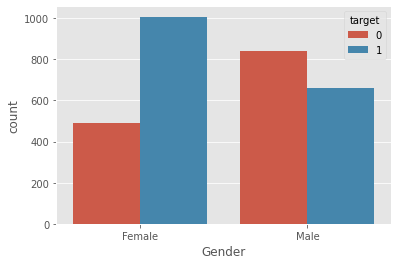

In [ ]:
sns.countplot(data=train,x='Gender',hue='target')

여성의 만족도가 남성의 만족도보다 더 높다. 

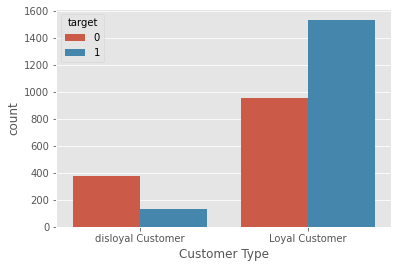

In [ ]:
sns.countplot(data=train,x='Customer Type',hue='target')

Loyal customer이 역시나 만족도가 좋다. disloyal이면 불만족이 더 크다.

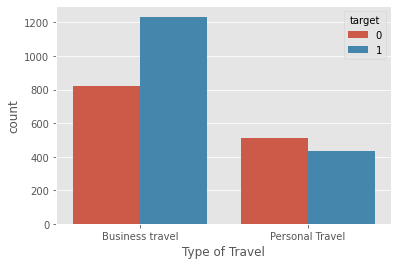

In [ ]:
sns.countplot(data=train,x='Type of Travel',hue='target')

비지니스용일 때 만족도가 높고, 개인적으로 이용할 때는 불만족이 더 높다. 

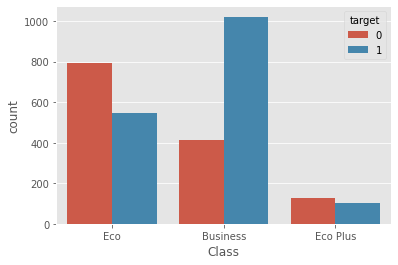

In [ ]:
sns.countplot(data=train,x='Class',hue='target')

역시 비지니스석이 만족도비율이 가장 높다.

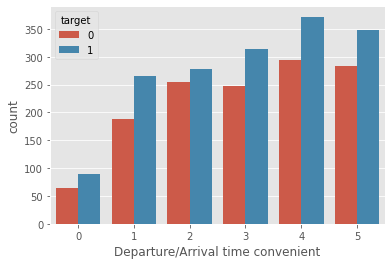

In [ ]:
sns.countplot(data=train,x='Departure/Arrival time convenient',hue='target')

출발,도착 시간 편의성 만족도가 높을수록 대개 만족도가 높다. 만족도를 4로 한 사람들이 가장 많은 것도 알 수 있다. 

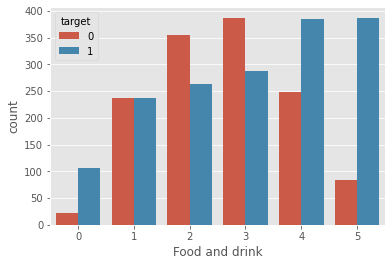

In [ ]:
sns.countplot(data=train,x='Food and drink',hue='target')

식음료 만족도와 만족도가 연계성이 꽤 높을 것 같다는 생각이 든다. 만족도가 높을 수록 만족도의 비율이 크고, 식음료 만족도가 낮을 수록 만족도의 비율이 낮다. 

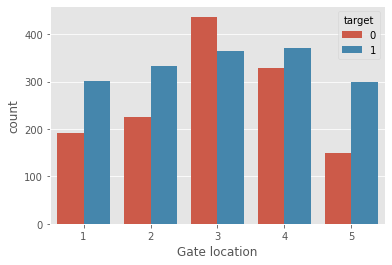

In [ ]:
sns.countplot(data=train,x='Gate location',hue='target')

딱히 관계성이 없어보인다. 게이트 위치 만족도가 낮아도 만족도가 높은 사람들이 있었다. 

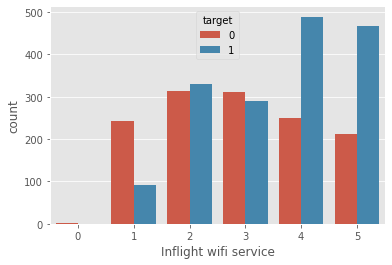

In [ ]:
sns.countplot(data=train,x='Inflight wifi service',hue='target')

역시 와이파이는 중요하다. 

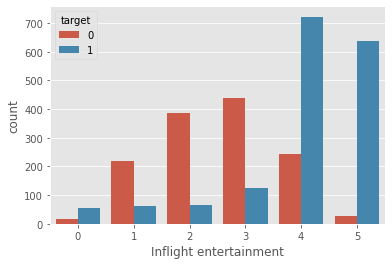

In [ ]:
sns.countplot(data=train,x='Inflight entertainment',hue='target')

기내 엔터테인먼트 만족도는 만족도와 큰 연관성을 가질 것이라 생각이 든다. 엔터테인먼트 만족도가 높을수록 만족과 불만족의 비율차이가 크다. 근데 궁금점이 생겼다. 0값이 있는 값도 있고 없는 값들도 있었다. 도대체 0값은 뭘까?!

In [ ]:
col=['Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding']

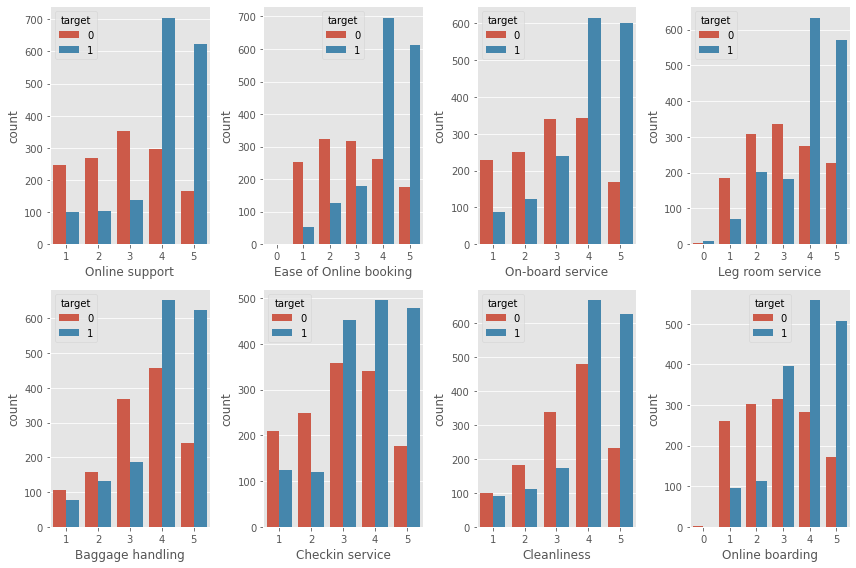

In [ ]:
plt.figure(figsize=(12,8))
for i,colname in enumerate(col):
  plt.subplot(2,4,i+1)
  sns.countplot(data=train,x=colname,hue='target')
plt.tight_layout()
plt.show()

[0에 대한 고찰_데이콘 코드공유](https://dacon.io/competitions/official/235871/codeshare/4494?page=1&dtype=recent)

* 0이 누락된 결측치나, 설문하지 않은 값을 모두 Nan 대신 0이라는 값으로 채워넣었다는 결론에 도달하게 되었습니다. 결론적으로 0을 데이터의 양이 적다고 1에 합치거나, 0~5로 label encoding을 하여 순서를 부여할 경우 학습에 안좋은 영향을 끼칠 수 있습니다. *
*따라서 만약 0값이 포함된 ordinal feature로 학습을 진행한다면 label encoding보다는 one-hot encoding을 이용하여 0에 의미를 부여하지 않는 것이 중요해 보입니다. *

In [ ]:
train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target'],
      dtype='object')

In [ ]:
num=['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']

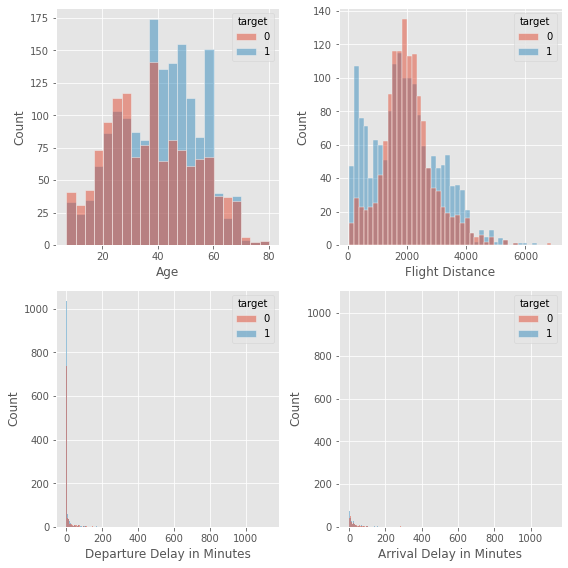

In [ ]:
plt.figure(figsize=(12,8))
for i,colname in enumerate(num):
  plt.subplot(2,2,i+1)
  sns.histplot(data=train,x=colname,hue='target')
plt.tight_layout()
plt.show()

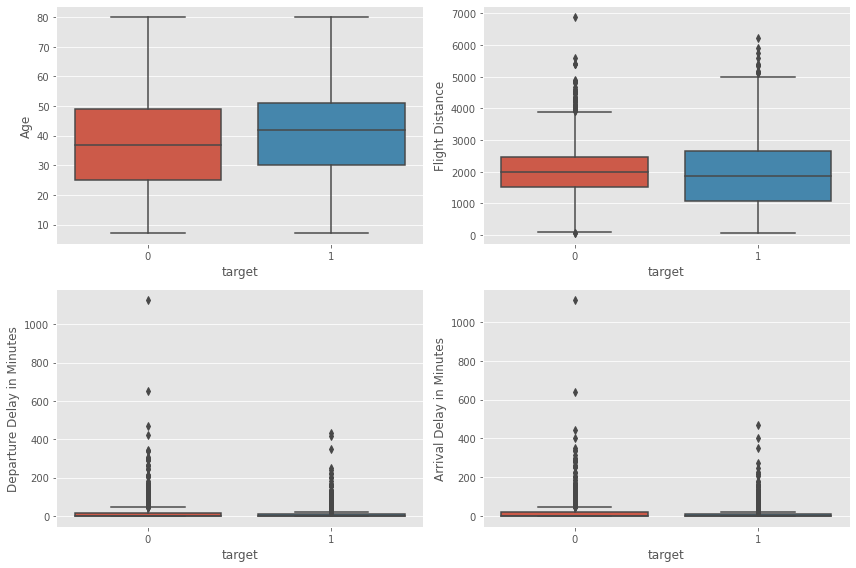

In [ ]:
plt.figure(figsize=(12,8))
for i,colname in enumerate(num):
  plt.subplot(2,2,i+1)
  sns.boxplot(data=train,y=colname,x='target')
plt.tight_layout()
plt.show()

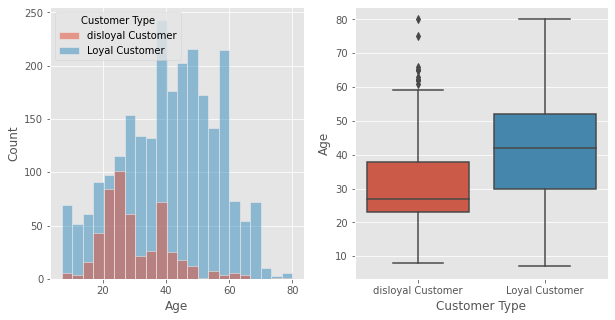

In [ ]:
#나이와 customer type의 관계
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=train,x='Age',hue='Customer Type')
plt.subplot(1,2,2)
sns.boxplot(data=train,y='Age',x='Customer Type')

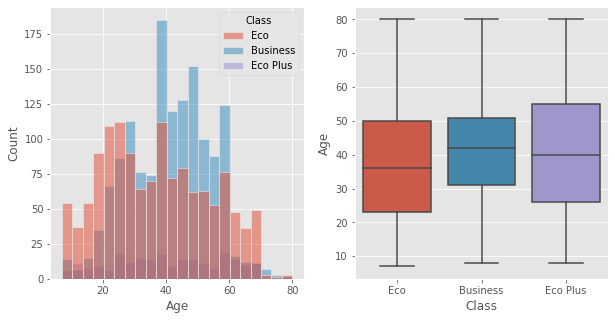

In [ ]:
#나이와 class의 관계
#나이와 customer type의 관계
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=train,x='Age',hue='Class')
plt.subplot(1,2,2)
sns.boxplot(data=train,y='Age',x='Class')

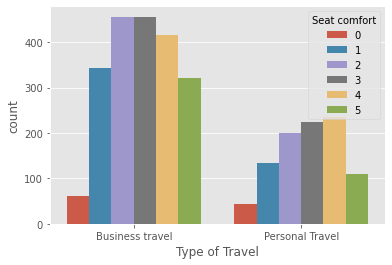

In [ ]:
#Type of Travel와 Seat comfort의 관계
sns.countplot(data=train,x='Type of Travel',hue='Seat comfort')

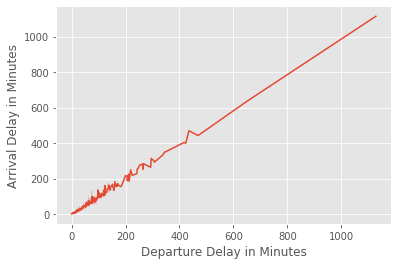

In [ ]:
#Departure Delay in Minutes와 Arrival Delay in Minutes의 관계
sns.lineplot(data=train,
             x='Departure Delay in Minutes',
             y='Arrival Delay in Minutes')

거의 선형성을 띈다. 다중공선성을 위해서 둘중 한 컬럼을 삭제해버릴 예정